In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load the sun direction file.
The three columns correspond to (x, y, z) in the detector coordinate (y upwards)

In [2]:
f = 'background_sun_pos.dat'

In [3]:
colnames = ['x', 'y', 'z']
v = pd.read_csv( f, header = None, sep = r'\s+', names = colnames, usecols = range(3))
v

,x,y,z
0,-0.154456,-0.279544,0.947628
1,0.026468,0.556131,-0.830673
2,0.310311,-0.176824,0.934045
3,0.817645,0.415564,-0.398452
4,0.182240,0.505329,0.843464
...,...,...,...
99995,-0.157420,-0.614440,-0.773099
99996,-0.708477,-0.697158,-0.109688
99997,-0.412879,-0.890970,-0.188955
99998,0.723472,0.437446,0.534069


In [4]:
v['x'].min(), v['x'].max(), v['y'].min(), v['y'].max(), v['z'].min(), v['z'].max()

(-0.928879, 0.92889, -0.934132, 0.934144, -0.999986, 0.999987)

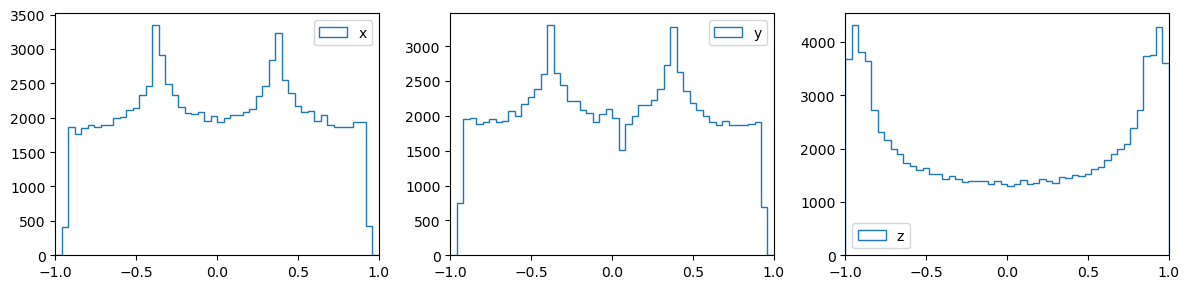

In [5]:
fig, ax = plt.subplots(1, 3, figsize = (12, 3), layout = 'tight' )

for i in range(3):
    ax[i].hist(v[colnames[i]], bins = np.linspace(-1, 1, 51), histtype = 'step', label = colnames[i])
    ax[i].legend()
    ax[i].set_xlim([-1, 1])

In [6]:
v['r'] = np.sqrt( v['x']**2 + v['y']**2 + v['z']**2 )
v['costh'] = v['z']/v['r']
v['phi'] = np.arctan2( v['y'], v['x'])

(-3.141592653589793, 3.141592653589793)

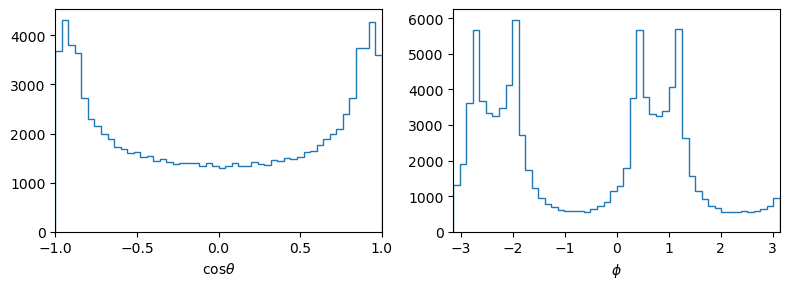

In [7]:
fig, ax = plt.subplots(1, 2, figsize = (8, 3), layout = 'tight' )
ax[0].hist( v['costh'], bins = np.linspace(-1, 1, 51), histtype = 'step', label = r'cos$thera$' )
ax[1].hist( v['phi'], bins = np.linspace(-np.pi, np.pi, 51), histtype = 'step', label = r'$phi$' )

ax[0].set_xlabel( r'cos$\theta$')
ax[1].set_xlabel( r'$\phi$' )
ax[0].set_xlim([-1, 1])
ax[1].set_xlim([-np.pi, np.pi])

Text(0, 0.5, '$\\phi$')

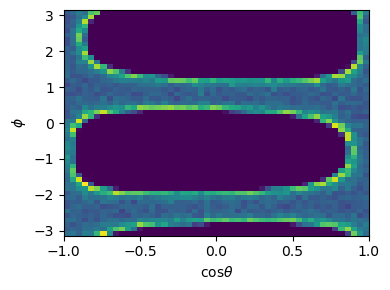

In [8]:
fig, ax = plt.subplots( figsize = (4, 3), layout = 'tight' )
costhBins = np.linspace(-1, 1, 51)
phiBins = np.linspace(-np.pi, np.pi, 51)
ax.hist2d( v['costh'], v['phi'], bins = (costhBins, phiBins))
ax.set_xlabel( r'cos$\theta$')
ax.set_ylabel( r'$\phi$')